In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

### Load in the Data
___

In [102]:
# Load in data: df
df = pd.read_csv('kiva_scraping.csv')
# Load only the data from 2013
df_2013 = df[df['Funded Date.year'] == 2013]

In [152]:
df.head()

,id,Funded Date,Funded Amount,Country,Country Code,Local Currency,Loan Amount,Paid Date,Paid Amount,Activity,...,Funded Date.hour,Funded Date.minute,Funded Date.second,Paid Date.year,Paid Date.month,Paid Date.day-of-month,Paid Date.day-of-week,Paid Date.hour,Paid Date.minute,Paid Date.second
0,84,2005-03-31T06:27:55Z,500,Uganda,UG,NaN,500,2005-12-13T12:00:40Z,500.0,Butcher Shop,...,6.0,27.0,55.0,2005.0,12.0,13.0,2.0,12.0,0.0,40.0
1,85,2005-03-31T06:27:55Z,500,Uganda,UG,NaN,500,2005-12-13T12:04:33Z,500.0,Food Production/Sales,...,6.0,27.0,55.0,2005.0,12.0,13.0,2.0,12.0,4.0,33.0
2,86,2005-03-31T06:27:55Z,500,Uganda,UG,NaN,500,2005-12-13T12:06:56Z,500.0,Animal Sales,...,6.0,27.0,55.0,2005.0,12.0,13.0,2.0,12.0,6.0,56.0
3,88,2005-03-31T06:27:55Z,300,Uganda,UG,NaN,300,2005-08-27T07:33:49Z,300.0,Clothing Sales,...,6.0,27.0,55.0,2005.0,8.0,27.0,6.0,7.0,33.0,49.0
4,89,2005-03-31T06:27:55Z,500,Uganda,UG,NaN,500,2005-12-13T12:09:18Z,500.0,Food Production/Sales,...,6.0,27.0,55.0,2005.0,12.0,13.0,2.0,12.0,9.0,18.0


In [103]:
df_2013.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50533 entries, 382860 to 560815
Data columns (total 29 columns):
id                          50533 non-null int64
Funded Date                 50533 non-null object
Funded Amount               50533 non-null int64
Country                     50533 non-null object
Country Code                50532 non-null object
Local Currency              50533 non-null object
Loan Amount                 50533 non-null int64
Paid Date                   3030 non-null object
Paid Amount                 50396 non-null float64
Activity                    50533 non-null object
Sector                      50533 non-null object
Delinquent                  50533 non-null bool
Name                        50533 non-null object
Use                         50532 non-null object
Status                      50533 non-null object
Funded Date.year            50533 non-null float64
Funded Date.month           50533 non-null float64
Funded Date.day-of-month    50533 non-

In [104]:
df_2013.describe()

,id,Funded Amount,Loan Amount,Paid Amount,Funded Date.year,Funded Date.month,Funded Date.day-of-month,Funded Date.day-of-week,Funded Date.hour,Funded Date.minute,Funded Date.second,Paid Date.year,Paid Date.month,Paid Date.day-of-month,Paid Date.day-of-week,Paid Date.hour,Paid Date.minute,Paid Date.second
count,50533.000000,50533.000000,50533.000000,50396.000000,50533.0,50533.000000,50533.000000,50533.000000,50533.000000,50533.000000,50533.000000,3030.0,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000
mean,536614.161241,928.750519,930.029387,271.716076,2013.0,3.012566,16.310569,3.943186,12.725110,29.728930,29.584390,2013.0,5.126073,17.660396,3.238944,10.300990,30.526733,30.253135
std,15050.392534,1035.095746,1035.398079,564.063505,0.0,1.398701,7.687476,1.939743,7.174004,17.215084,17.368769,0.0,0.945850,3.187730,1.949766,2.265295,16.916232,16.865409
min,500127.000000,0.000000,25.000000,0.000000,2013.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2013.0,2.000000,1.000000,1.000000,8.000000,0.000000,0.000000
25%,523939.000000,350.000000,350.000000,42.282500,2013.0,2.000000,11.000000,2.000000,6.000000,15.000000,15.000000,2013.0,5.000000,17.000000,1.000000,9.000000,17.000000,16.000000
50%,536723.000000,600.000000,600.000000,121.010000,2013.0,3.000000,17.000000,4.000000,14.000000,30.000000,30.000000,2013.0,5.000000,17.000000,3.000000,10.000000,36.000000,30.000000
75%,549594.000000,1075.000000,1075.000000,266.345000,2013.0,4.000000,21.000000,6.000000,19.000000,45.000000,45.000000,2013.0,6.000000,18.000000,5.000000,11.000000,44.000000,45.000000
max,562429.000000,25000.000000,25000.000000,7886.220000,2013.0,7.000000,31.000000,7.000000,23.000000,59.000000,59.000000,2013.0,7.000000,30.000000,7.000000,21.000000,59.000000,59.000000


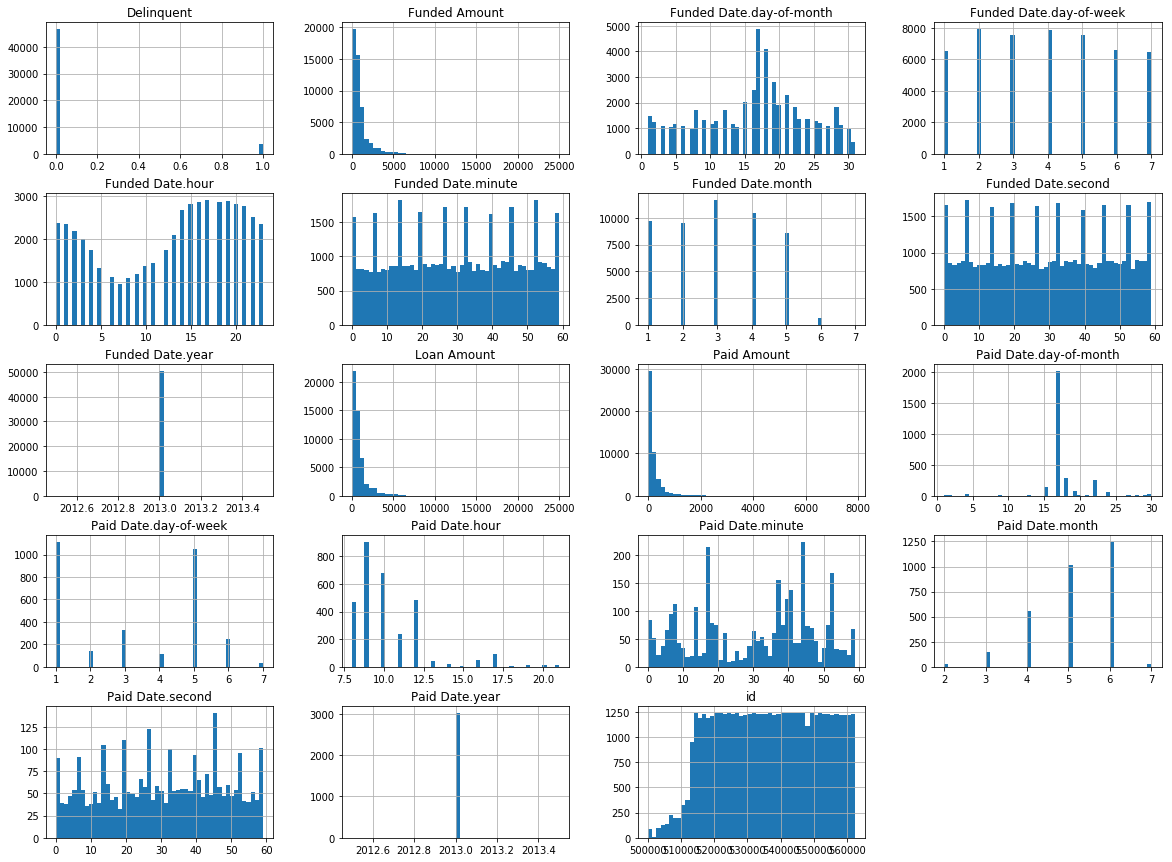

In [105]:
df_2013.hist(bins=50, figsize=(20,15))
plt.show()

In [106]:
# Split data into train and test set: train_set, test_set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_2013, test_size=0.2, random_state=42)

### Clean the Data
___

In [95]:
# Remove usesless rows: df_select
cols = ['Funded Amount','Country','Loan Amount','Paid Amount','Activity','Sector','Delinquent']
df_select = train_set[cols]

# One_hot_encode categorical columns: df_dummies
df_dummies = pd.get_dummies(df_select)

# Select features and target: X, y
y = df_dummies.pop('Delinquent')
X = df_dummies

# Fill in missing values
mean = X['Paid Amount'].mean()
X['Paid Amount'].fillna(value=mean, inplace=True)

In [107]:
# Split data into train and test set: train_set, test_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Build simple Decision Tree: dt
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Test predictions. Calculate accuracy: y_pred
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035369774919614

In [113]:
# Build a second Decision Tree: dt_cv
from sklearn.tree import DecisionTreeClassifier
dt_cv = DecisionTreeClassifier()

# 5-fold cross validate the training set and compute average accuracy: scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
print(scores.mean())

0.909761060631612


In [151]:
feature_importance = sorted(list(zip(dt.feature_importances_, X_train.columns)), reverse=True)
feature_importance[0:10]

[(0.43869199737117076, 'Paid Amount'),
 (0.14375835852269184, 'Funded Amount'),
 (0.10364017256191824, 'Loan Amount'),
 (0.026463175264753263, 'Sector_Agriculture'),
 (0.009571706663302265, 'Country_Burundi'),
 (0.008657761938689073, 'Activity_General Store'),
 (0.008417904101246546, 'Country_Benin'),
 (0.008218700115354503, 'Country_Ghana'),
 (0.006360524115116612, 'Activity_Retail'),
 (0.006047377022501736, 'Activity_Food Production/Sales')]